 ## Dataset 
 https://www.kaggle.com/datasets/anasmohammedtahir/covidqu

#### Download do dataset

In [ ]:
! pip install -q kaggle

In [ ]:
! kaggle datasets download -d shawngano/gano-cat-breed-image-collection

### Extraindo os arquivos do dataset

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('gano-cat-breed-image-collection.zip', 'r')
zip_ref.extractall()
zip_ref.close()

# Treinamento


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [35]:
# Batch size is the number of training examples used to train the network at a time.

# What is better, to have a large batch size or a small one?
# It depends on the problem. Large batch sizes can speed up the training process, but they make the training process less stable.
# Small batch sizes provide a more stable training process, but they slow down the training process.

# The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

batch_size = 32
image_size = (256, 256)

# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data.

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = 'dataset/Lung Segmentation Data/Train',

    seed=123,
    image_size=image_size,
    batch_size=batch_size
    )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = 'dataset/Lung Segmentation Data/Val',

    seed=123,
    image_size=image_size,
    batch_size=batch_size
    )


Found 14507 files belonging to 2 classes.
Found 3615 files belonging to 2 classes.


2023-06-13 01:09:01.350474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [14507]
	 [[{{node Placeholder/_4}}]]
2023-06-13 01:09:01.351062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [14507]
	 [[{{node Placeholder/_0}}]]


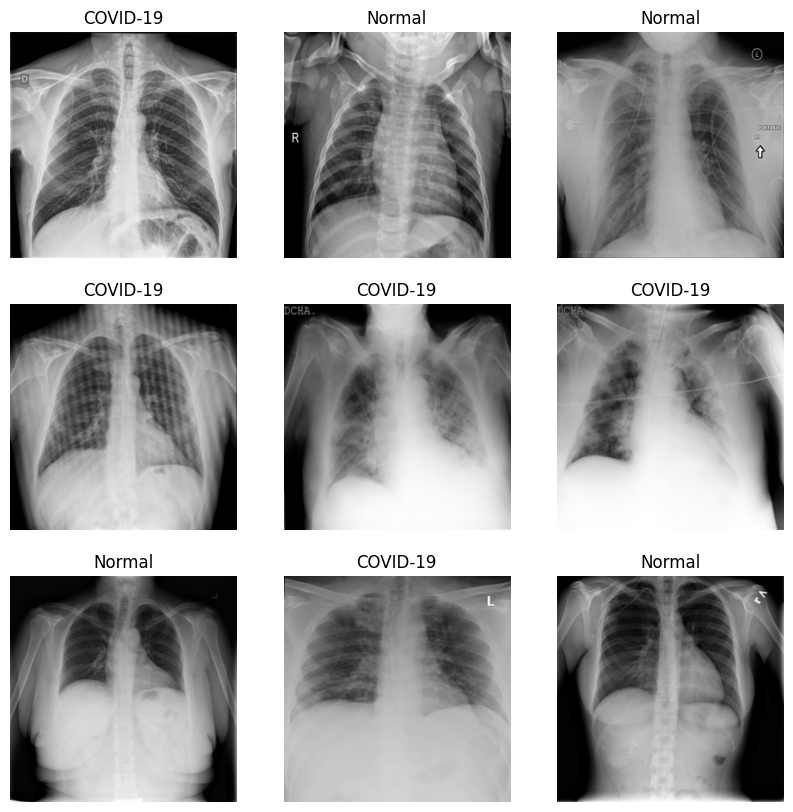

In [43]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

In [37]:
# Normalizar

#def process(image,label):
    #image = tf.cast(image/31. ,tf.float32)
    #return image,label

#train_ds = train_ds.map(process)
#validation_ds = val_ds.map(process)

In [38]:

model = keras.Sequential([
    # Rescaling - Rescale the image to a value between 0 and 1, because the values of the pixels are between 0 and 255
    keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
    # Augmentation - Randomly flip the image horizontally and vertically
    keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    # Convolutional layer - Extract features from the image
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    # Pooling layer - Reduce the dimensionality of the image
    keras.layers.MaxPooling2D(),
    # Convolutional layer - Extract features from the image
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    # Pooling layer - Reduce the dimensionality of the image
    keras.layers.MaxPooling2D(),
    # Convolutional layer - Extract features from the image
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    # Pooling layer - Reduce the dimensionality of the image
    keras.layers.MaxPooling2D(),
    # Flatten layer - Flatten the image from 2D to 1D
    keras.layers.Flatten(),
    # Dense layer - Reduce the dimensionality of the image
    keras.layers.Dense(128, activation='relu'),
    # Dropout layer - Reduce overfitting
    keras.layers.Dense(1, activation='sigmoid')
    ])




In [39]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 random_flip_5 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                 

In [40]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
    )

Epoch 1/10


2023-06-13 00:35:29.386070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [14507]
	 [[{{node Placeholder/_4}}]]
2023-06-13 00:35:29.386319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [14507]
	 [[{{node Placeholder/_4}}]]


454/454 [==============================] - ETA: 0s - loss: 0.3976 - accuracy: 0.8129

2023-06-13 00:38:41.541138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3615]
	 [[{{node Placeholder/_0}}]]
2023-06-13 00:38:41.541489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3615]
	 [[{{node Placeholder/_0}}]]


454/454 [==============================] - 201s 441ms/step - loss: 0.3976 - accuracy: 0.8129 - val_loss: 0.2351 - val_accuracy: 0.9059
Epoch 2/10
454/454 [==============================] - 207s 455ms/step - loss: 0.2039 - accuracy: 0.9195 - val_loss: 0.1637 - val_accuracy: 0.9333
Epoch 3/10
454/454 [==============================] - 217s 478ms/step - loss: 0.1447 - accuracy: 0.9420 - val_loss: 0.2234 - val_accuracy: 0.9126
Epoch 4/10
454/454 [==============================] - 203s 448ms/step - loss: 0.1069 - accuracy: 0.9584 - val_loss: 0.1067 - val_accuracy: 0.9599
Epoch 5/10
454/454 [==============================] - 196s 432ms/step - loss: 0.0779 - accuracy: 0.9704 - val_loss: 0.1029 - val_accuracy: 0.9624
Epoch 6/10
454/454 [==============================] - 197s 435ms/step - loss: 0.0617 - accuracy: 0.9766 - val_loss: 0.0933 - val_accuracy: 0.9671
Epoch 7/10
454/454 [==============================] - 198s 436ms/step - loss: 0.0488 - accuracy: 0.9829 - val_loss: 0.0950 - val_accura

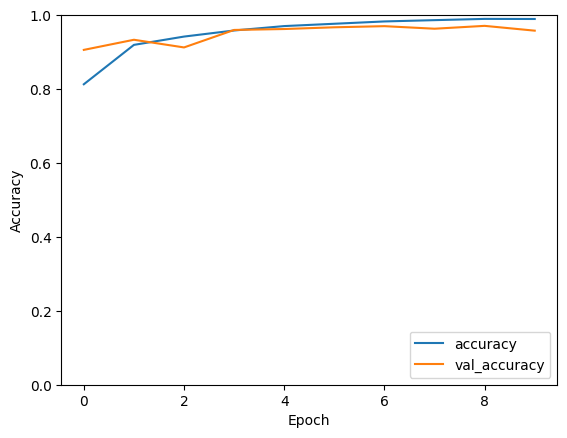

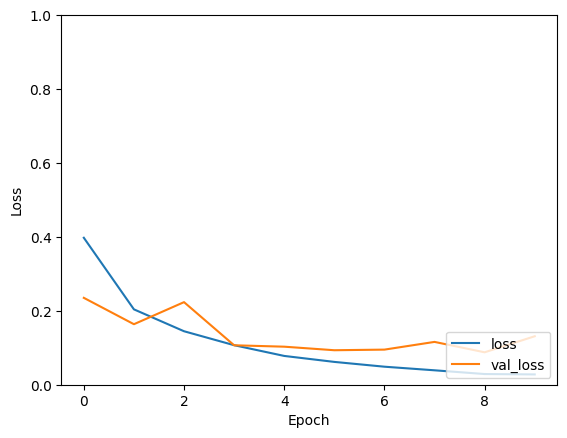

In [41]:
# Plotting the accuracy and loss of the model

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [42]:
# Now we save the model:
model.save('model/model_covid.h5')